# Neural Network Classification

In [1]:
import tensorflow as tf
from sklearn.datasets import make_circles

In [2]:
# Make 1000 examples
n_samples = 1000

# Create circle: Make a large circle containing a smaller in 2D
# A simple toy dataset to visualize clustering and classification problems
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

**Visualize the data**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


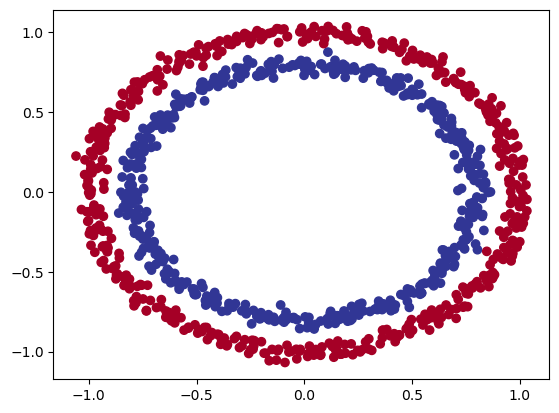

In [7]:
# visualize with a plot

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

**Input and Output Shape**

In [8]:
# check the shape
X.shape, y.shape

((1000, 2), (1000,))

**Modelling**

In [9]:
# Random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,))
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.1909 - accuracy: 0.4800
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 2.6166 - accuracy: 0.4840
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7594 - accuracy: 0.4950
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7113 - accuracy: 0.4920
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7002 - accuracy: 0.4980


> Accuracy of `49.7%` as shown above denote that the model is guessing. Hence, improve the model.

**Improve the model**

In [10]:
# add another layer - making (2) layers & optimizer (adam)

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_shape=(2,)),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss="binary_crossentropy", 
                optimizer='adam', metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2644 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 3.1609 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4337 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3187 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2576 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2087 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1670 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1303 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0977 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0678 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4820
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5080
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5220
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5090
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5080
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4920
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4760
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4960
Epoch 93/100


**Model 3**

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(2,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss="binary_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.8730 - accuracy: 0.5140
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7525 - accuracy: 0.4940
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.5050
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.4680
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.4810
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7022 - accuracy: 0.4880
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5040
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.5090
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4850
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.4800
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4940
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4930
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5100
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.4730
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4800
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4860
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5020
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4580
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.5190
Epoch 93/100


> Regardless of the modification, the model still perform badly.

**Visualize the model predictions**

In [12]:
model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[0.49870208],
       [0.51756585],
       [0.51852876],
       [0.5180739 ],
       [0.49185032],
       [0.5190309 ],
       [0.5142045 ],
       [0.49766856],
       [0.50079215],
       [0.51771396],
       [0.5093487 ],
       [0.5070303 ],
       [0.5158277 ],
       [0.49350598],
       [0.49278018],
       [0.4964121 ],
       [0.51511335],
       [0.49720547],
       [0.5159173 ],
       [0.5073981 ],
       [0.5024699 ],
       [0.52181846],
       [0.4969085 ],
       [0.49934337],
       [0.5224901 ],
       [0.52036124],
       [0.5120091 ],
       [0.49404684],
       [0.49551794],
       [0.49322012],
       [0.5016131 ],
       [0.51876986],
       [0.51372665],
       [0.49332774],
       [0.497104  ],
       [0.52314824],
       [0.51915866],
       [0.50734735],
       [0.49564698],
       [0.5027816 ],
       [0.50653726],
       [0.5106209 ],
       [0.50897473],
       [0.4931009 ],
       [0.5114739 ],
       [0.514708  ],
       [0.4929425 ],
       [0.510

**N.B:** Make a plot function to visualize the model prediction.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    """
    Plot the decision boundary created by a model predicting on X
    """
    # define the axis boundary of the plot and create meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # create the meshgrid
    xx, yy = np.meshgrid(
                np.linspace(x_min, x_max, 100),
                np.linspace(y_min, y_max, 100))

    # create X value
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # make predictions
    y_pred = model.predict(x_in)

    # check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification...") 
        # reshape the prediction to get them ready
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification...")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
Doing binary classification...


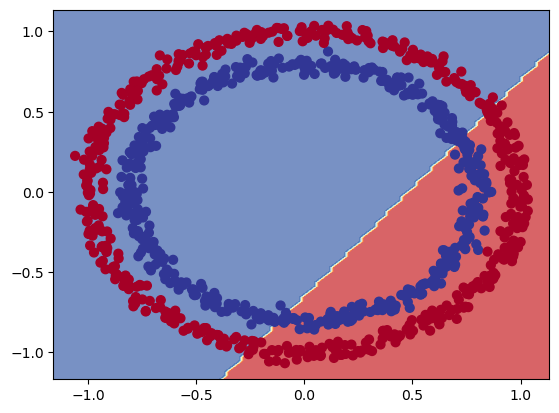

In [16]:
plot_decision_boundary(model_3,X,y)

> **Extra resources online:** 
> Check out `CS231n Neural Network` and `Made with ML` github page.

**NOTE:**
The model behave poorly because it is predicting the classification problem as a straight line (regression problem).

In [18]:
# Try the model on a regression problem

tf.random.set_seed(42)

# create some regression data
X_reg = tf.range(0, 1000, 5)
y_reg = tf.range(100, 1100, 5) # y = X + 100

# split out into training and test set
X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

# Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\AD\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\AD\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\AD\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\AD\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\AD\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\AD\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


> It is wrong to compile our regression model problem with `binary cross entropy`. Since it is a regression problem, use `loss="mae"` `metrics=['mae']` or any other regression losses.

In [19]:
X_reg_train.shape

TensorShape([150])

In [20]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss="mae", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# 3. Fit the model
model_4.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 436.5166 - mae: 436.5166
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 340.3063 - mae: 340.3063
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 246.9570 - mae: 246.9570
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 148.8181 - mae: 148.8181
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 56.5914 - mae: 56.5914
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 72.2408 - mae: 72.2408
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 75.6478 - mae: 75.6478
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 51.0507 - mae: 51.0507
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9647 - mae: 45.9647
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 47.6167 - mae: 47.6167
Epoch 11/100
5/5 [==============================] -

5/5 [==============================] - 0s 3ms/step - loss: 39.1243 - mae: 39.1243
Epoch 88/100
5/5 [==============================] - 0s 3ms/step - loss: 39.4827 - mae: 39.4827
Epoch 89/100
5/5 [==============================] - 0s 3ms/step - loss: 39.0562 - mae: 39.0562
Epoch 90/100
5/5 [==============================] - 0s 3ms/step - loss: 39.0364 - mae: 39.0364
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 38.9366 - mae: 38.9366
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 39.0490 - mae: 39.0490
Epoch 93/100
5/5 [==============================] - 0s 2ms/step - loss: 39.3424 - mae: 39.3424
Epoch 94/100
5/5 [==============================] - 0s 2ms/step - loss: 38.6921 - mae: 38.6921
Epoch 95/100
5/5 [==============================] - 0s 3ms/step - loss: 39.0632 - mae: 39.0632
Epoch 96/100
5/5 [==============================] - 0s 2ms/step - loss: 38.9999 - mae: 38.9999
Epoch 97/100
5/5 [==============================] - 0s 2ms/step

2/2 [==============================] - 0s 4ms/step


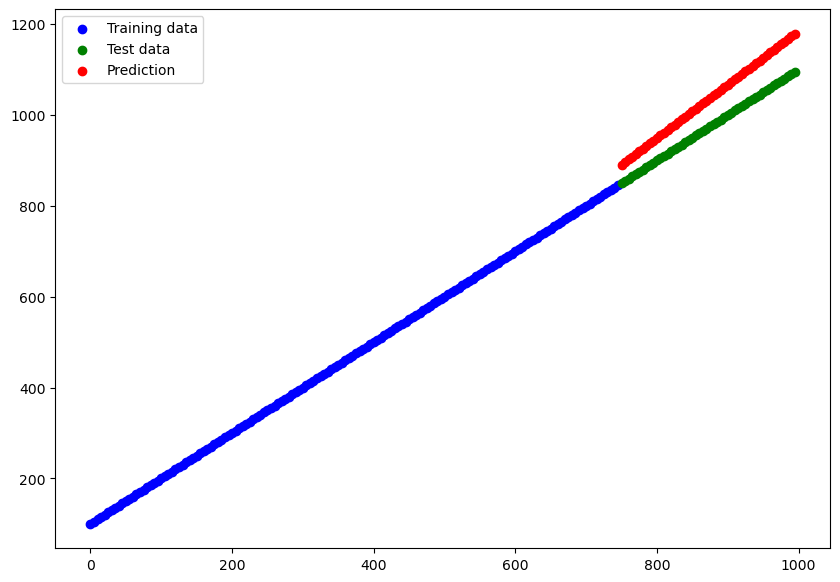

In [21]:
# Make prediction with the model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predicition
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Prediction")
plt.legend();

In [22]:
X_reg_train.shape

TensorShape([150])

## Non - Linearity. Click <a href="./02 - Non-linearity.ipynb">here</a> for source code.